# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [13]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, MetaData, Table
import pandas as pd
Base = automap_base()
Base.prepare(engine, reflect = True)

In [11]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

In [14]:
Base.classes.keys()

['emoji']

## Explore Database

In [17]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)

In [20]:
# Use Inspector to print the column names and types
for row in inspector.get_columns("emoji"):
    print(row["name"])

id
emoji_char
emoji_id
name
score


In [25]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
data = engine.execute("SELECT * FROM Emoji LIMIT 10")
for record in data:
    print(record)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect Database and Query

In [26]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [27]:
# Start a session to query the database
session = Session(engine)

## Query to get the Emoji Data

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [42]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query results
results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).order_by(Emoji.score.desc()).all()
results

[('😂', '1F602', 1814832150),
 ('❤️', '2764', 840619939),
 ('😍', '1F60D', 680382416),
 ('♥️', '2665', 652715459),
 ('😭', '1F62D', 515991922),
 ('😊', '1F60A', 484540701),
 ('♻️', '267B', 452489849),
 ('😒', '1F612', 441690175),
 ('💕', '1F495', 381679908),
 ('😘', '1F618', 377847645),
 ('😩', '1F629', 343967555),
 ('☺️', '263A', 333263710),
 ('👌', '1F44C', 311468371),
 ('😔', '1F614', 283873968),
 ('😏', '1F60F', 275930731),
 ('😁', '1F601', 268504794),
 ('⬅️', '2B05', 225109999),
 ('😉', '1F609', 210995480),
 ('👍', '1F44D', 186214004),
 ('😌', '1F60C', 180720579),
 ('🙏', '1F64F', 175057316),
 ('🎶', '1F3B6', 170127733),
 ('😢', '1F622', 166417040),
 ('😎', '1F60E', 160872106),
 ('😅', '1F605', 160434523),
 ('👀', '1F440', 159984970),
 ('😳', '1F633', 156664610),
 ('🙌', '1F64C', 154175844),
 ('💔', '1F494', 152572644),
 ('🙈', '1F648', 148162690),
 ('✌️', '270C', 143975239),
 ('✨', '2728', 139984564),
 ('💙', '1F499', 139339131),
 ('💜', '1F49C', 137264417),
 ('💯', '1F4AF', 134780880),
 ('😴', '1F634', 1308

Unpack tuples using list comprehensions

In [44]:
# Unpack the "Top 10" `emoji_id` and `scores` from results and save into separate lists.
top_10 = results[:10]
top_10

[('😂', '1F602', 1814832150),
 ('❤️', '2764', 840619939),
 ('😍', '1F60D', 680382416),
 ('♥️', '2665', 652715459),
 ('😭', '1F62D', 515991922),
 ('😊', '1F60A', 484540701),
 ('♻️', '267B', 452489849),
 ('😒', '1F612', 441690175),
 ('💕', '1F495', 381679908),
 ('😘', '1F618', 377847645)]

## Plot using Matplotlib

<ipython-input-53-d069e29e587b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels (emoji_id)


[Text(0, 0.0, '1F602'),
 Text(0, 2.0, '2764'),
 Text(0, 4.0, '1F60D'),
 Text(0, 6.0, '2665'),
 Text(0, 8.0, '1F62D'),
 Text(0, 10.0, '1F60A'),
 Text(0, 12.0, '267B')]

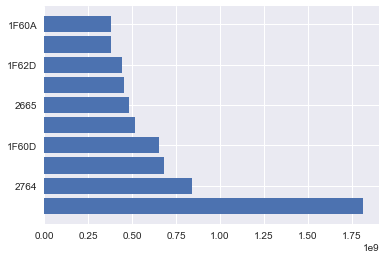

In [53]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
emoji_id = [ok[1 ]for ok in top_10]
emoji_scores = [ok[2]for ok in top_10]
fig, ax = plt.subplots()
ypos = range(1, len(emoji_scores)+1)
ax.barh(ypos, emoji_scores)
ax.set_yticklabels (emoji_id)

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [54]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
df.head(10)

,0,1,2
0,😂,1,1814832150
1,❤️,2,840619939
2,😍,3,680382416
3,♥️,4,652715459
4,😭,5,515991922
5,😊,6,484540701
6,♻️,7,452489849
7,😒,8,441690175
8,💕,9,381679908
9,😘,10,377847645


Plot using Pandas

<AxesSubplot:>

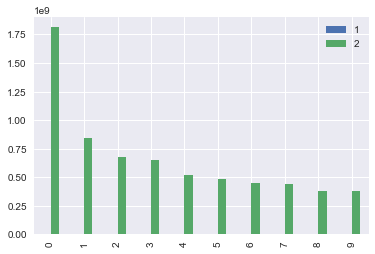

In [55]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
df.plot(kind = "bar")

In [ ]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE